# Classifying Chest Pain

>## Authors: Derek, Eric, and Selina

### Introduction

Heart disease can refer to several types of heart conditions which will affect the function of the heart. About 1 in 12 (or 2.6 million) Canadian adults age 20 and over live with diagnosed heart disease (Canadian Chronic Disease Surveillance, 2017). There are many reasons and key risk factors that cause heart diseases such as high blood pressure, high blood cholesterol, and some other unhealthy behaviours that are harmful to our bodies. The most common symptom of heart disease is chest pain. The heart-related chest pain is pressure or tightness in your chest. There are also many types of chest pain caused by reduced blood flow to the heart. Our project will focus on the different factors that can lead to chest pain. The predictive question of classification that we will attempt to answer is whether serum cholesterol and resting blood pressure can be used to predict what type of chest pain an individual will have. The dataset that we use to answer the question is the heart disease dataset within the “heart_disease.data” from the dataset folder which contains the information and values related to heart diseases along with the “heart_disease_description.names” so understand the column names and values.

### Dataset read into R & Clean and wrangle

In [100]:
set.seed(1)
library(dplyr)
library(readxl)
library(tidyverse)

heart_disease_data <- read_csv("data/heart_disease.data", col_names = FALSE, na = c("?")) |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    mutate(cp = as_factor(cp)) |>
    drop_na(chol) |> # we should count how many are dropped in total, so the amount of na's and 0's, and then do the same thing with trestbps
    filter(chol != 0)

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [101]:
heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2
55,1,4,142,228,0,1,149,1,2.5,1,NA,NA,1
66,1,3,110,213,1,2,99,1,1.3,2,NA,NA,0
65,1,4,150,236,1,1,105,1,0.0,NA,NA,NA,3
60,1,2,160,267,1,1,157,0,0.5,2,NA,NA,1
56,1,2,126,166,0,1,140,0,0.0,NA,NA,NA,0
62,1,4,120,220,0,1,86,0,0.0,NA,NA,NA,0


### Split Test and Train data

In [102]:
library(tidymodels)

heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = cp)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) 

In [103]:
glimpse(heart_disease_train)
glimpse(heart_disease_test)

Rows: 107
Columns: 14
$ age      <dbl> 66, 55, 60, 67, 55, 65, 72, 55, 62, 49, 62, 48, 61, 68, 62, 7…
$ sex      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ cp       <fct> 3, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 2…
$ trestbps <dbl> 110, NA, NA, 142, 110, NA, 120, NA, 112, NA, NA, 132, 142, NA…
$ chol     <dbl> 213, 228, 316, 270, 214, 252, 214, 245, 258, 142, 204, 220, 2…
$ fbs      <dbl> 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0…
$ restecg  <dbl> 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1…
$ thalach  <dbl> 99, NA, NA, 125, 180, NA, 102, NA, 150, NA, NA, 162, 100, NA,…
$ exang    <dbl> 1, NA, NA, 0, 0, NA, 1, NA, 1, NA, NA, 0, 0, NA, 0, NA, NA, 0…
$ oldpeak  <dbl> 1.3, NA, NA, 2.5, NA, NA, 1.0, NA, NA, NA, NA, 0.0, 1.5, NA, …
$ slope    <dbl> 2, NA, NA, 1, NA, NA, 2, NA, NA, NA, NA, NA, 3, NA, NA, NA, N…
$ ca       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ thal     <dbl> N

### Summarize & Report the number of observations and percentages in each class

In [104]:
heart_disease_observations <- heart_disease_train |>
                      group_by(cp) |>
                      summarize(n = n()) |>
                      mutate(percent = 100 * n / nrow(heart_disease_train))

In [105]:
heart_disease_observations

cp,n,percent
<fct>,<int>,<dbl>
1,7,6.542056
2,7,6.542056
3,20,18.691589
4,73,68.224299


### Summarize the means of the predictor variables & Shows how many rows have missing data

In [106]:
heart_trestbps <- heart_disease_train |>
                      group_by(trestbps) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train)) |>
                      filter(is.na(trestbps))

heart_chol <- heart_disease_train |>
                      group_by(chol) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))|>
                      filter(is.na(chol))

heart_trestbps_mean <- heart_disease_train |>
                      group_by(trestbps) |> 
                      summarize(n = n()) |>
                      mutate(percent = mean(trestbps)) 

heart_chol_mean <- heart_disease_train |>
                      group_by(chol) |> 
                      summarize(n = n()) |>
                      mutate(percent = mean(chol)) 

In [107]:
heart_trestbps
heart_chol

heart_trestbps_mean
heart_chol_mean

trestbps,n,percent
<dbl>,<int>,<dbl>
NA,28,26.16822


chol,n,percent
<dbl>,<int>,<dbl>


trestbps,n,percent
<dbl>,<int>,<dbl>
96,1,NA
100,1,NA
110,6,NA
112,1,NA
114,1,NA
116,1,NA
118,1,NA
120,7,NA
122,4,NA


chol,n,percent
<dbl>,<int>,<dbl>
139,1,245.5769
142,1,245.5769
153,1,245.5769
160,1,245.5769
166,1,245.5769
171,2,245.5769
173,1,245.5769
175,1,245.5769
181,1,245.5769


###  Data Visualization

In [110]:
options(repr.plot.width = 10, repr.plot.height = 7)

chol_hist <- ggplot(heart_disease_train, aes(x = chol)) + # histogram for chol observations
    geom_histogram() +
    labs(x = "Serum Cholestoral (mg/dl)", y = "Number of Observations") +
    ggtitle("Number of Observations of Cholesterol in Training Dataset") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(breaks = pretty_breaks())

trestbps_hist <- ggplot(heart_disease_train, aes(x = trestbps)) + # histogram for resting blood pressure observations
    geom_histogram() +
    labs(x = "Serum Cholestoral (mg/dl)", y = "Resting Blood Pressure (mmHg)") +
    ggtitle("Number of Observations of Resting Blood Pressure (mmHg) in Training Dataset") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(breaks = pretty_breaks())

heart_plot <- heart_disease_train |> # visualizing the plot for knn
    ggplot(aes(x = trestbps, y = chol, color = cp)) +
    geom_point(alpha = 0.5) +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Serum Cholestoral (mg/dl)", color = "Chest Pain Types") + 
    scale_color_manual(labels = c("Typical Angina", "Atypical Angina","Non-Anginal Pain","Asymptomatic"), 
                     values = c("orange2", "steelblue2","purple2", "green2")) + 
    theme(text = element_text(size = 12)) +
    ggtitle("Serum Cholestoral vs Resting Blood Pressure") + 
    theme(plot.title = element_text(hjust = 0.5))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 28 rows containing non-finite values (stat_bin).”


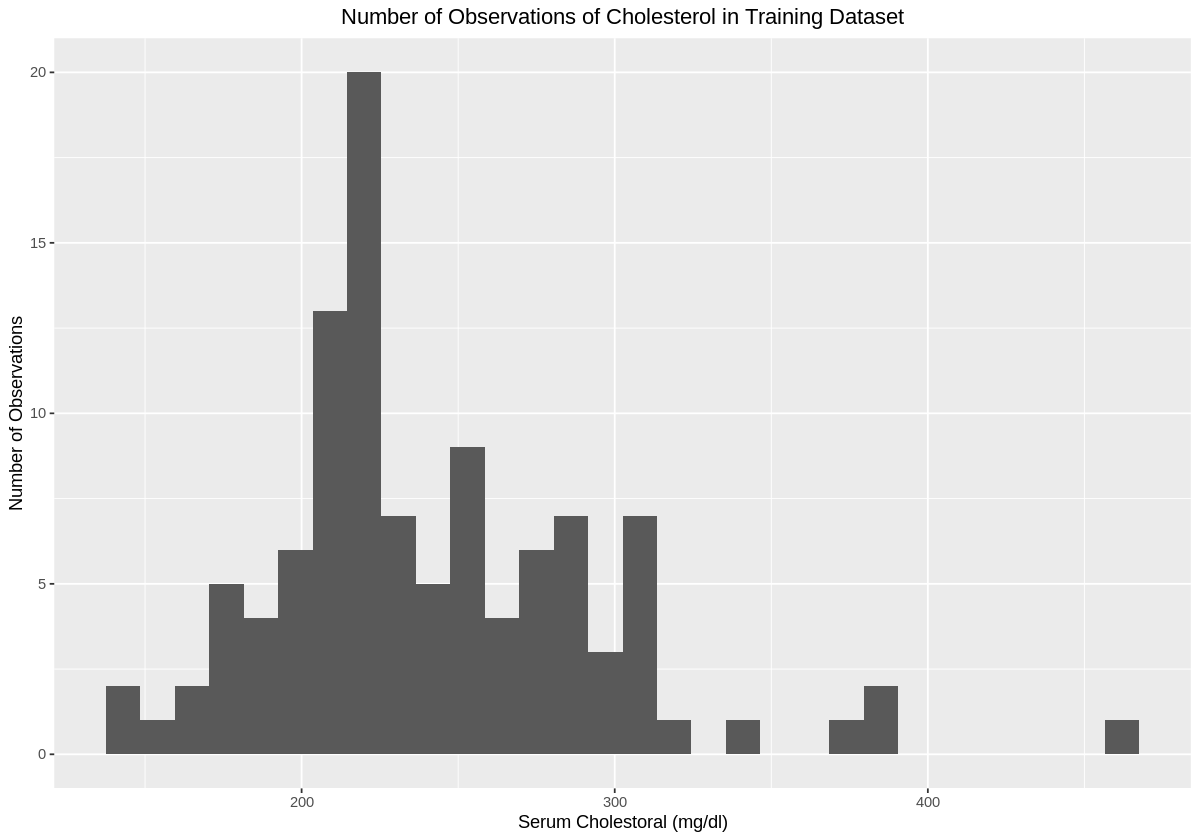

Warning message:
“Removed 28 rows containing missing values (geom_point).”


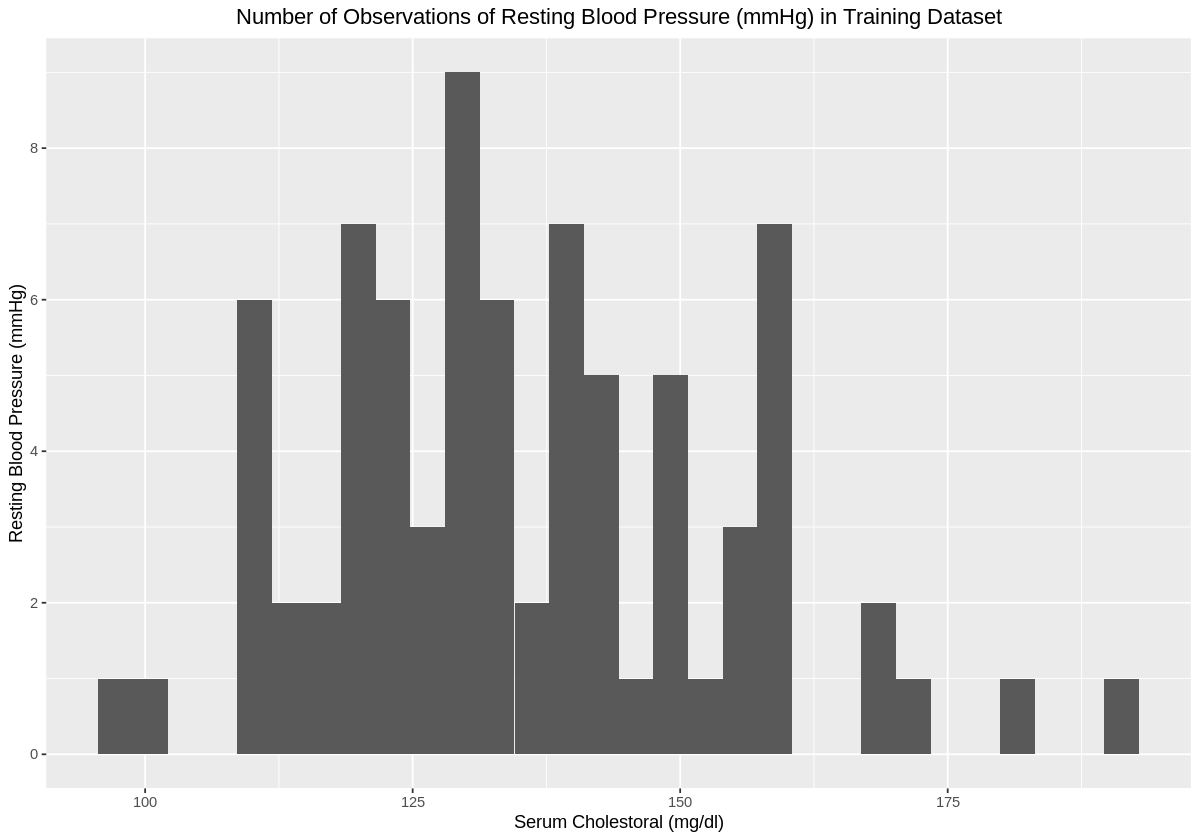

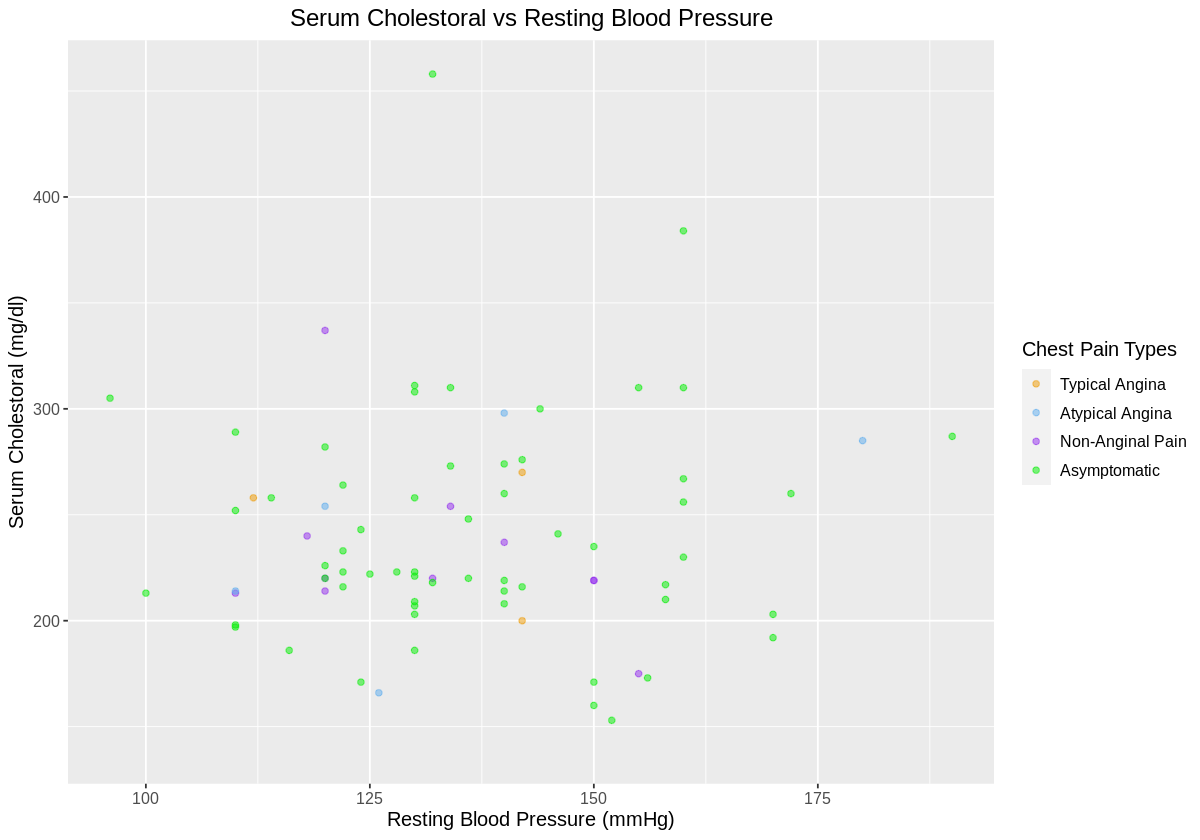

In [109]:
chol_hist
trestbps_hist
heart_plot

## References

Public Health Agency of Canada. (n.d.). Heart Disease in Canada - Canada.ca. Retrieved October 28, 2022, from https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html